In [2]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
import pyaudio
import sounddevice as sd

In [76]:
micData = np.loadtxt('obj_dir/MIC_1_RIGHT.dat')
def sig2db(mag_spec):
    return 20*np.log10(mag_spec)

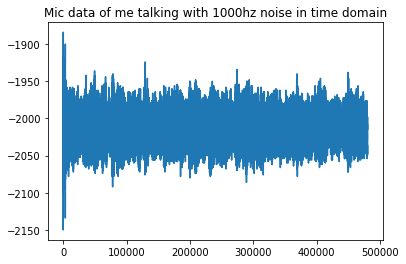

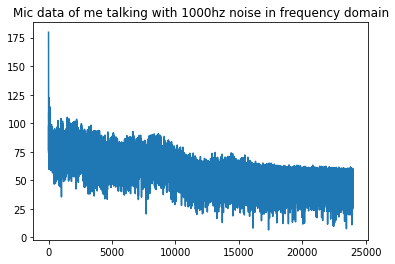

In [77]:
plt.figure()
plt.title("Mic data of me talking with 1000hz noise in time domain")
plt.plot(micData)

plt.figure()
plt.title("Mic data of me talking with 1000hz noise in frequency domain")
plt.plot(np.linspace(0,24000,len(np.fft.rfft(micData))),sig2db(np.abs(np.fft.rfft(micData))))

In [118]:
micFiltered = np.loadtxt('obj_dir/out.dat')

In [119]:
print(micFiltered)

[0. 0. 0. ... 0. 0. 0.]


In [120]:
def bit_not(n, numbits=8):
    return (1 << numbits) - 1 - n

def negatives(arr):
    out = np.array([])
    for n in range(len(arr)):
        arr[n] = twos_comp(arr[n],16)
            
def twos_comp(val, bits):
    """compute the 2's complement of int value val"""
    if (val & (1 << (bits - 1))) != 0: # if sign bit is set e.g., 8bit: 128-255
        val = val - (1 << bits)        # compute negative value
    return val        

In [121]:
ints = np.int64(micFiltered)
negatives(ints)
print(ints[:-1])


[0 0 0 ... 0 0 0]


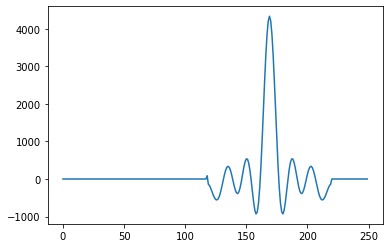

In [122]:

plt.plot(ints[750:1000])


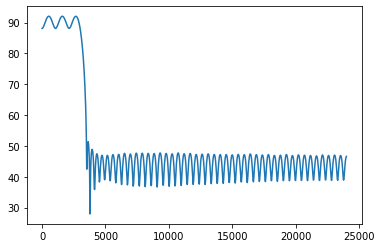

In [123]:
plt.plot(np.linspace(0,24000,len(np.fft.rfft(ints[:-1]))),sig2db(np.abs(np.fft.rfft(ints[:-1]))))

In [97]:
from IPython.display import Audio

def sound( x, rate=8000, label=''):
    from IPython.display import display, Audio, HTML
    if label is '':
        display( Audio( x, rate=rate))
    else:
        display( HTML( 
        '<style> table, th, td {border: 0px; }</style> <table><tr><td>' + label + 
        '</td><td>' + Audio( x, rate=rate)._reprhtml()[3:] + '</td></tr></table>'
        ))
        
sound(ints[:-1], rate=48000)

In [73]:
np.savetxt("ints.dat",ints)